In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib.patches import Circle, Wedge
from matplotlib.collections import PatchCollection
import re

**2DLines**

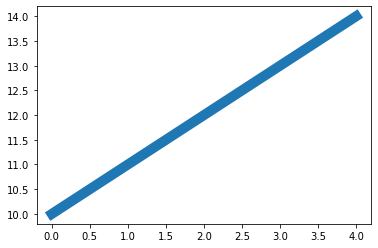

In [2]:
x = range(0, 5)
y = range(10, 15)
plt.plot(x, y, linewidth=10)

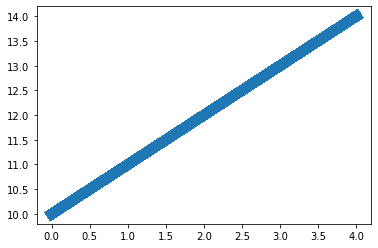

In [3]:
line, = plt.plot(x, y, linewidth=10)
line.set_antialiased(False)  # 关闭抗锯齿功能

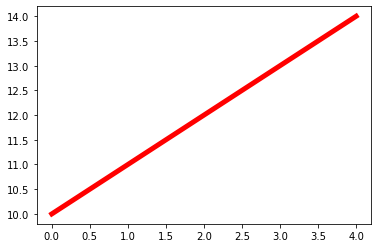

In [4]:
lines = plt.plot(x, y)
plt.setp(lines, color='r', linewidth=5);  # 有了;才能取消返回的值

[<matplotlib.lines.Line2D object at 0x000001CAF4427B20>, <matplotlib.lines.Line2D object at 0x000001CAF4427EB0>]


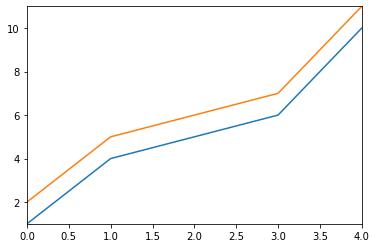

In [5]:
x = range(0,5)
y1 = [1,4,5,6,10]
y2 = [2,5,6,7,11]
fig, ax = plt.subplots()
ax.plot(x, y1)
ax.plot(x, y2)
ax.set_xlim(0,4)
ax.set_ylim(1,11)
print(ax.lines)  # 通过直接使用辅助方法画线，打印ax.lines后可以看到在matplotlib在底层创建了两个Line2D对象

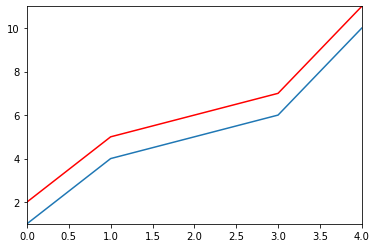

In [6]:
fig, ax = plt.subplots()
lines = [Line2D(x, y1), Line2D(x, y2, color='r')]
for line in lines:
    ax.add_line(line)
ax.set_xlim(0,4)
ax.set_ylim(1,11);

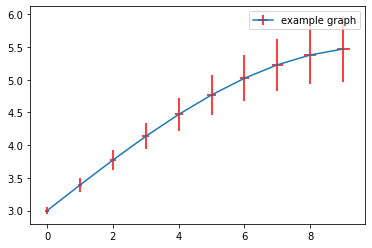

In [7]:
fig, ax = plt.subplots()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.5, 10)
xerr = np.linspace(0.05, 0.2, 10)
ax.errorbar(x, y + 3, yerr=yerr, xerr=xerr, label='example graph', ecolor='red')  # 竖线或横线为该点值的误差范围
ax.legend()

**patches**

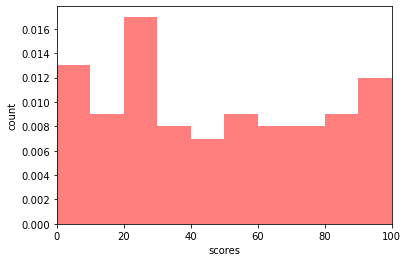

In [8]:
x = np.random.randint(0, 100, 100)
bins = np.arange(0, 101, 10)
plt.hist(x, bins, color='r', alpha=0.5, density=True)
plt.xlabel("scores")
plt.ylabel("count")
plt.xlim(0, 100);

In [9]:
df = pd.DataFrame(columns = ['data'])
df.loc[:,'data'] = x
df['fenzu'] = pd.cut(df['data'], bins=bins, right = False,include_lowest=True)

df_cnt = df['fenzu'].value_counts().reset_index()
df_cnt.loc[:,'mini'] = df_cnt['index'].astype(str).map(lambda x:re.findall('\[(.*)\,',x)[0]).astype(int)
df_cnt.loc[:,'maxi'] = df_cnt['index'].astype(str).map(lambda x:re.findall('\,(.*)\)',x)[0]).astype(int)
df_cnt.loc[:,'width'] = df_cnt['maxi']- df_cnt['mini']
df_cnt.sort_values('mini',ascending = True,inplace = True)
df_cnt.reset_index(inplace = True,drop = True)

In [10]:
df_cnt.head()

,index,fenzu,mini,maxi,width
0,"[0, 10)",13,0,10,10
1,"[10, 20)",9,10,20,10
2,"[20, 30)",17,20,30,10
3,"[30, 40)",8,30,40,10
4,"[40, 50)",7,40,50,10


(0.0, 20.0)

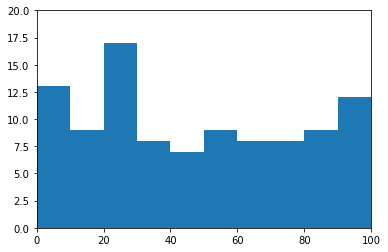

In [11]:
fig, ax = plt.subplots()
for i in df_cnt.index:
                         # 直方图的锚点 x y的坐标值，直方图的宽度（默认是向锚点右侧扩展），直方图的高度   
    rect = plt.Rectangle((df_cnt.loc[i,"maxi"],0),-1 * df_cnt.loc[i,'width'],df_cnt.loc[i,'fenzu'])
    ax.add_patch(rect)
ax.set_xlim(0, 100)
ax.set_ylim(0, 20)

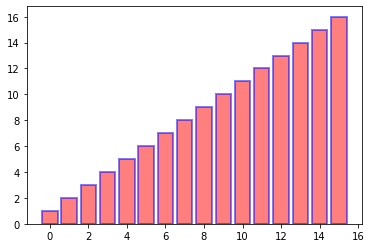

In [12]:
x = np.arange(16)
y = range(1, 17)
plt.bar(x, y, alpha=0.5, width=0.8, color='r', edgecolor='b', label='Bar', lw=2);  # lw是图形边缘宽度

(1.0, 17.0)

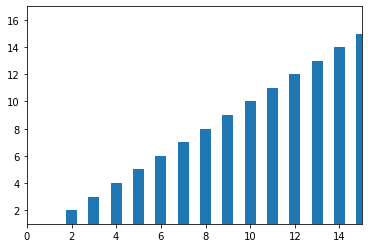

In [13]:
fig, ax = plt.subplots()
for i in y:
    rect = plt.Rectangle((i + 0.25, 0), -0.25 * 2, i)
    ax.add_patch(rect)
ax.set_xlim(0, 15)
ax.set_ylim(1, 17)

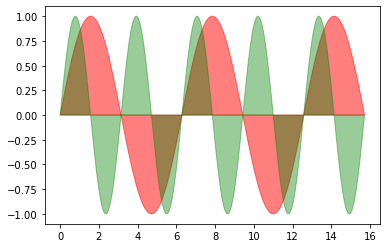

In [14]:
x = np.linspace(0, 5 * np.pi, 1000)
y1 = np.sin(x)
y2 = np.sin(2 * x) 
plt.fill(x, y1, color="red", alpha=0.5);  # 填充的范围是个区间，即y中的min和max，具体还是看图理解
plt.fill(x, y2, color='green', alpha=0.4);

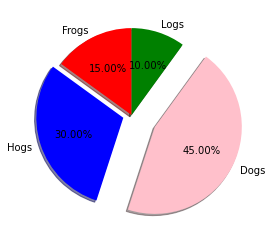

In [15]:
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10] 
explode = [0, 0.1, 0.3, 0]
colors = ['r', 'b', 'pink','g']
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90, colors=colors);

**collections**

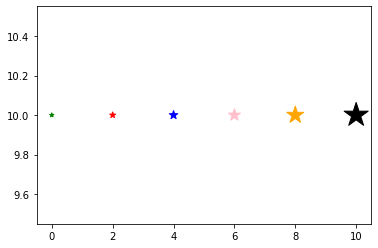

In [16]:
x = [0, 2, 4, 6, 8, 10]
y = [10 for t in range(len(x))]
s = [20 * 2 ** n for n in range(len(x))]
c = ["green", 'red', 'blue', 'pink', 'orange', 'black']
plt.scatter(x, y, s=s, marker='*', c=c);

**images**

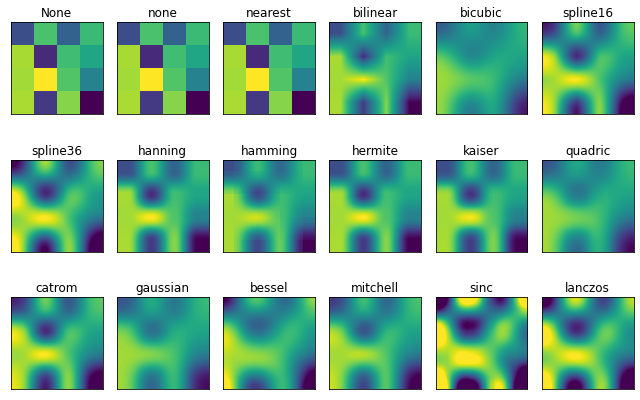

In [17]:
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']


grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
                    # interpolation 设置不同的差值方法，可以显示不同的色差
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))

plt.tight_layout();

AxesSubplot(0.125,0.536818;0.775x0.343182)


[<AxesSubplot:>]

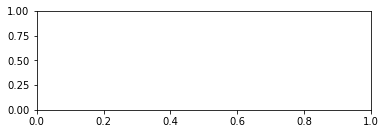

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(211)  # 做一个2 * 1的图，选择第一个子图
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3])
print(ax1)
fig.delaxes(ax2)
fig.axes

<AxesSubplot:>

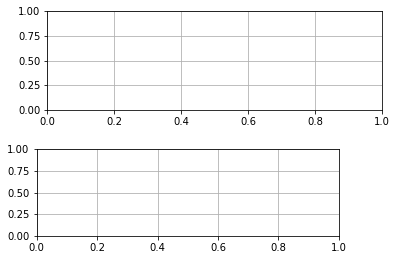

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3])
for ax in fig.axes:
    ax.grid(True)
ax1

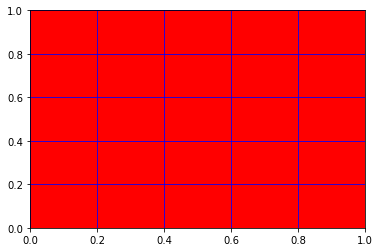

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.patch
rect.set_facecolor('red')
ax.grid(True, c='b')

array([-0.2,  4.2])

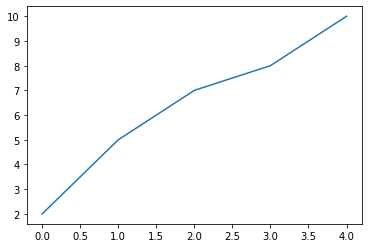

In [21]:
# 不用print，直接显示结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

fig, ax = plt.subplots()
x = range(0,5)
y = [2,5,7,8,10]
plt.plot(x, y, '-')

axis = ax.xaxis # axis为X轴对象
axis.get_ticklocs()     # 获取刻度线位置
axis.get_ticklabels()   # 获取刻度label列表(一个Text实例的列表）。 可以通过minor=True|False关键字参数控制输出minor还是major的tick label。
axis.get_ticklines()    # 获取刻度线列表(一个Line2D实例的列表）。 可以通过minor=True|False关键字参数控制输出minor还是major的tick line。
axis.get_data_interval()# 获取轴刻度间隔
axis.get_view_interval()# 获取轴视角（位置）的间隔

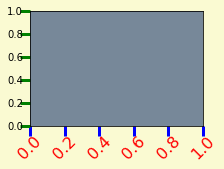

In [22]:
fig = plt.figure() # 创建一个新图表
rect = fig.patch   # 矩形实例并将其设为黄色
rect.set_facecolor('lightgoldenrodyellow')

ax1 = fig.add_axes([0.1, 0.3, 0.4, 0.4]) # 创一个axes对象，从(0.1,0.3)的位置开始，宽和高都为0.4，
rect = ax1.patch   # ax1的矩形设为灰色
rect.set_facecolor('lightslategray')


for label in ax1.xaxis.get_ticklabels(): 
    # 调用x轴刻度标签实例，是一个text实例
    label.set_color('red') # 颜色
    label.set_rotation(45) # 旋转角度
    label.set_fontsize(16) # 字体大小

for line in ax1.xaxis.get_ticklines():
    line.set_markeredgecolor('blue')
    line.set_markersize(10)  # 对于x轴，是竖直
    line.set_markeredgewidth(3)
    
for line in ax1.yaxis.get_ticklines():
    # 调用y轴刻度线条实例, 是一个Line2D实例
    line.set_markeredgecolor('green')    # 对于线条颜色设置，需要是markeredgecolor,与文本颜色不同
    line.set_markersize(10)    # 对于y轴，是水平 marker大小/长度
    line.set_markeredgewidth(3)# marker粗细

Text(17, 30, 'money')

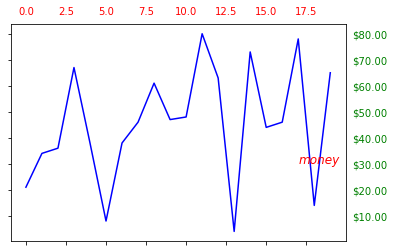

In [23]:
fig, ax = plt.subplots()
x = np.arange(20)
y = np.random.randint(0, 100, 20)
ax.plot(x, y, color='b')
ax.text(17, 30, "money", fontsize=12, color = "r", style = "italic", weight = "light", rotation=0)  # 设置文本的位置
formatter = mpl.ticker.FormatStrFormatter("$%.2f")
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_tick_params(which='major', labelcolor='green', labelleft=False, labelright=True)
ax.xaxis.set_tick_params(which='major', labelcolor='red', labelleft=False, labelright=True)


(0.0, 10.0)

(0.0, 20.0)

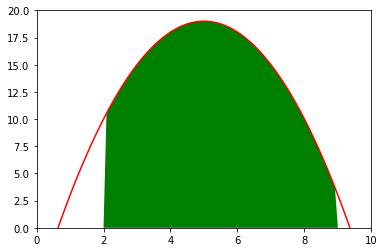

In [24]:
x1 = np.linspace(0, 10, 100)
def get(x):
    return -1 * (x - 2) * (x - 8) + 10
y1 = get(x1)
fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 20)
ax.plot(x1, y1, 'r');
x2 = np.linspace(2, 9, 80)
y2 = get(x2)
y2[0] = y2[-1] = 0
ax.fill(x2, y2, 'g')

(0.0, 10.0)

(0.0, 20.0)

<BarContainer object of 25 artists>

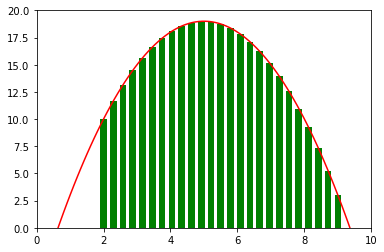

In [25]:
x1 = np.linspace(0, 10, 100)
def get(x):
    return -1 * (x - 2) * (x - 8) + 10
y1 = get(x1)
fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 20)
ax.plot(x1, y1, 'r');
x2 = np.linspace(2, 9, 25)
y2 = get(x2)
ax.bar(x2, y2, color='green', width=0.2)